**Problem 6.4**

Eq 6.10: $y=ce^{kx}$

Eq 6.9: $\frac{\partial e}{\partial a_i}=2\sum_{j=1}^n [\psi(x_j,a)-y_j]\frac{\partial_{\psi}(x_j,a)}{\partial a_i}=0$

Where $n$ ranges over the number of data points we have and $i=[1,2]$

$\frac{\partial_{\psi}(x_j,a)}{\partial a_1}=e^{kx}$

$\frac{\partial_{\psi}(x_j,a)}{\partial a_2}=xce^{kx}$

Thus we must find $c,k$ such that:

$[\psi(x_1,a) - y_1]e^{kx_1} + [\psi(x_2,a) - y_2]e^{kx_2}+ ... + [\psi(x_n,a) - y_n]e^{kx_n}=0$

$[\psi(x_1,a) - y_1]x_1ce^{kx_1}+[\psi(x_2,a) - y_2]x_2ce^{kx_2}+...+[\psi(x_n,a) - y_n]x_nce^{kx_n}=0$

Which since we know $\psi$ we have:

$[ce^{kx_1} - y_1]e^{kx_1} + [ce^{kx_2} - y_2]e^{kx_2}+ ... + [ce^{kx_n} - y_n]e^{kx_n}=0$

$[ce^{kx_1} - y_1]x_1ce^{kx_1}+[ce^{kx_2} - y_2]x_2ce^{kx_2}+...+[ce^{kx_n} - y_n]x_nce^{kx_n}=0$

for some $ k,c$

Obviously, attacking this analytically is quite difficult. Thus we attempt to do it numerically.

Unfortunately, the problem descriptions states to use Mathematica...we attempted to use it but were unsuccessful. Thus, we proceed to use Python:

In [109]:
import numpy as np
import scipy as cp
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

We create a distribution of data that is "exponential" in form:

In [110]:
c = np.random.random((1,100))*1.1
k = np.random.random((1,100))
x = np.random.random((1,100))*3.
yData = c*np.exp(k*x)

We plot our "exponential" in form data:

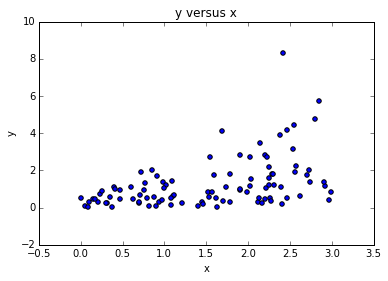

In [111]:
plt.scatter(x,yData)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y versus x')

We now create two functions. These are the individual elements in the sums above. The final function returns a vector of the sum of each f1, f2:

In [112]:
def f1(xi,yi,ci,ki):
    return (ci*np.exp(ki*xi)-yi)*np.exp(ki*xi)

In [113]:
def f2(xi,yi,ci,ki):
    return (ci*np.exp(ki*xi)-yi)*ci*xi*np.exp(ki*xi)

In [114]:
def F(arg):
    c = arg[0]
    k = arg[1]
    #print c,k
    f1Vect = np.vectorize(f1,excluded=['ci','ki'])
    f2Vect = np.vectorize(f2,excluded=['ci','ki'])
    f1Re = f1Vect(x,yData,c,k)
    f2Re = f2Vect(x,yData,c,k)
    return np.array([np.sum(f1Re),np.sum(f2Re)])

We now proceed to find the root of our function numerically:

In [115]:
x2 = np.linspace(0,3,100)
rs = optimize.root(F,[0.5,0.5])

In [116]:
yFit = rs.x[0]*np.exp(rs.x[1]*x2)

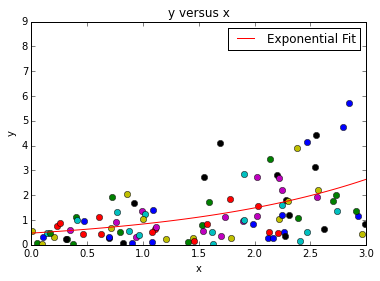

In [117]:
plt.plot(x,yData,'o')
plt.plot(x2,yFit,label='Exponential Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y versus x')